In [433]:
using DifferentialEquations,Plots,DataFrames,Distributions

In [470]:
pars=[]
function par_generator(N_Cells)
        append!(pars,N_Cells)
        z = rand(Uniform(10,25),N_Cells)
        println(z)
        append!(pars,repeat(z,2))
        println(pars)
        append!(pars,rand(Uniform(-0.5,0.5),2*N_Cells))#Noise
        append!(pars,rand(Uniform(1,5),2)) #Alpha and Beta
        append!(pars,rand(Uniform(1,1.1))) #K
        append!(pars,rand(Uniform(0.002,0.005)),2) #Degradation rate
    
end
par_generator(20)

[23.815958282988113, 23.567497456517174, 15.67045779592102, 12.551786694094403, 14.447126687662644, 12.953590432140428, 11.134430005883772, 11.689879453606544, 15.04544322633484, 18.936016563842465, 17.774735853301692, 20.62696165372305, 22.673529793749545, 16.734322158889828, 24.775069389844617, 24.828290323193603, 10.614578481076887, 19.46873224176242, 16.484623418310605, 16.41062554900658]
Any[20, 23.815958282988113, 23.567497456517174, 15.67045779592102, 12.551786694094403, 14.447126687662644, 12.953590432140428, 11.134430005883772, 11.689879453606544, 15.04544322633484, 18.936016563842465, 17.774735853301692, 20.62696165372305, 22.673529793749545, 16.734322158889828, 24.775069389844617, 24.828290323193603, 10.614578481076887, 19.46873224176242, 16.484623418310605, 16.41062554900658, 23.815958282988113, 23.567497456517174, 15.67045779592102, 12.551786694094403, 14.447126687662644, 12.953590432140428, 11.134430005883772, 11.689879453606544, 15.04544322633484, 18.936016563842465, 17.

86-element Vector{Any}:
 20
 23.815958282988113
 23.567497456517174
 15.67045779592102
 12.551786694094403
 14.447126687662644
 12.953590432140428
 11.134430005883772
 11.689879453606544
 15.04544322633484
 18.936016563842465
 17.774735853301692
 20.62696165372305
  ⋮
  0.15193871926103164
 -0.1763009859758079
  0.49936150597918216
  0.029855284937659654
  0.10191519451469733
 -0.04377711877223123
 -0.24629705308945338
  4.149369802756861
  4.042006710162887
  1.093176386570975
  0.004660782494952286
  2

In [471]:
p=[]
N_Cells=pars[1]
p = pars[4*N_Cells+2:4*N_Cells+6]

5-element Vector{Any}:
 4.149369802756861
 4.042006710162887
 1.093176386570975
 0.004660782494952286
 2

In [472]:

function Simple_model(du,u,p,t)
    N_Cells=pars[1]
    A  = u[1:(N_Cells)]
    B  = u[(N_Cells+1):(2*N_Cells)]
    
    for i in 1:N_Cells
    du[i]=p[1]/(1+(B[i]/p[3])) -p[4]*A[i]
    du[(1*N_Cells)+i]= (p[2]/(1+(A[i]/p[3])))-p[5]*B[i]
    end
    
end

Simple_model (generic function with 1 method)

In [473]:
N_Cells=pars[1]
u0 = zeros(2*N_Cells)
for k = 1 : 2*N_Cells
    u0[k] = (pars[k+1] +pars[2*N_Cells+1+k])
end

tmax = 1000
tspan = (0.0,tmax)
prob  = ODEProblem(Simple_model,u0,tspan,p)
sol   = solve(prob)
df=DataFrame(sol)

,x1,x2,x3,x4,x5,x6,x7,x8,x9
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,23.3677,23.3752,23.3957,23.4351,23.5133,23.6567,23.9128,24.3365,24.9833
2,23.6537,23.6608,23.6808,23.7192,23.7961,23.9376,24.1908,24.611,25.254
3,15.6648,15.6829,15.7258,15.7975,15.9259,16.1419,16.4975,17.0402,17.8053
4,12.1936,12.2178,12.273,12.3625,12.5178,12.7708,13.1733,13.7656,14.5728
5,14.5699,14.5905,14.6386,14.718,14.8583,15.091,15.4686,16.0356,16.8228
6,12.5442,12.5672,12.6202,12.7062,12.8564,13.1022,13.4957,14.0784,14.8774
7,11.0907,11.1192,11.1836,11.2863,11.4619,11.7423,12.1788,12.8064,13.6432
8,11.8492,11.8755,11.9352,12.0312,12.1966,12.4635,12.8837,13.4948,14.3186
9,15.5314,15.55,15.5939,15.6672,15.7981,16.0175,16.3778,16.9258,17.696


In [474]:
Time_vector=sol.t

97-element Vector{Float64}:
    0.0
    0.08136200933106671
    0.2280382406121358
    0.4019287449561937
    0.6157673418424976
    0.8587217382650459
    1.132881711892818
    1.4320432633165727
    1.755254954321487
    2.0993867143896847
    2.4639719670377573
    2.8494046816833567
    3.2589235074301106
    ⋮
  366.5458458300878
  393.64630618652325
  424.59955032016
  459.51384359437094
  500.0545119624129
  547.0270331908542
  602.8813037313708
  669.7781575637906
  751.7624800995901
  853.362570758948
  981.2958714149609
 1000.0

In [475]:
A_fate_df = df[1:2:end,:] #All A levels dataframe

,x1,x2,x3,x4,x5,x6,x7,x8,x9
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,23.3677,23.3752,23.3957,23.4351,23.5133,23.6567,23.9128,24.3365,24.9833
2,15.6648,15.6829,15.7258,15.7975,15.9259,16.1419,16.4975,17.0402,17.8053
3,14.5699,14.5905,14.6386,14.718,14.8583,15.091,15.4686,16.0356,16.8228
4,11.0907,11.1192,11.1836,11.2863,11.4619,11.7423,12.1788,12.8064,13.6432
5,15.5314,15.55,15.5939,15.6672,15.7981,16.0175,16.3778,16.9258,17.696
6,18.2115,18.2258,18.2604,18.3202,18.4303,18.6203,18.9413,19.4443,20.1724
7,23.1692,23.1775,23.1998,23.2419,23.3246,23.4749,23.7411,24.1779,24.8391
8,25.2707,25.2767,25.2942,25.3293,25.4012,25.5355,25.779,26.1869,26.8169
9,10.2171,10.247,10.3144,10.4214,10.603,10.8912,11.3364,11.9716,12.8131


In [476]:
B_fate_df = df[2:2:end,:] #All B levels dataframe

,x1,x2,x3,x4,x5,x6,x7,x8,x9
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,23.6537,23.6608,23.6808,23.7192,23.7961,23.9376,24.1908,24.611,25.254
2,12.1936,12.2178,12.273,12.3625,12.5178,12.7708,13.1733,13.7656,14.5728
3,12.5442,12.5672,12.6202,12.7062,12.8564,13.1022,13.4957,14.0784,14.8774
4,11.8492,11.8755,11.9352,12.0312,12.1966,12.4635,12.8837,13.4948,14.3186
5,19.0783,19.0911,19.1228,19.1783,19.2818,19.4621,19.7698,20.2571,20.9696
6,21.0822,21.0926,21.1193,21.1675,21.2597,21.4237,21.7091,22.1694,22.8549
7,16.3196,16.3355,16.3737,16.4384,16.5558,16.7558,17.0898,17.6073,18.3482
8,24.6239,24.6297,24.6467,24.6809,24.7509,24.882,25.1203,25.521,26.1424
9,19.0895,19.1015,19.1316,19.1845,19.2836,19.4574,19.7557,20.2314,20.9317


In [477]:
A_greater_df = DataFrame(A_fate_df .> B_fate_df)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14
,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [478]:
B_greater_df = DataFrame(A_fate_df .< B_fate_df)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14
,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [479]:
A_B_equal_df = DataFrame(A_fate_df .== B_fate_df)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14
,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [480]:
Fate_df=zeros(size(A_greater_df))
Size_1 = size(A_greater_df)[1]
Size_2 = size(A_greater_df)[2]

97

In [481]:

for i in 1:1:Size_1
    for j in 1:1:Size_2
        if A_greater_df[i,j] == 1
            Fate_df[i,j] = 'A'
        elseif B_greater_df[i,j] == 1
            Fate_df[i,j] = 'B'
        elseif A_B_equal_df[i,j] == 1
            Fate_df[i,j] = 'U'
            
        end
    end
end

In [482]:
Fate_df

20×97 Matrix{Float64}:
 66.0  66.0  66.0  66.0  66.0  66.0  …  66.0  66.0  66.0  66.0  66.0  66.0
 65.0  65.0  65.0  65.0  65.0  65.0     65.0  65.0  65.0  65.0  65.0  65.0
 65.0  65.0  65.0  65.0  65.0  65.0     65.0  65.0  65.0  65.0  65.0  65.0
 66.0  66.0  66.0  66.0  66.0  66.0     66.0  66.0  66.0  66.0  66.0  66.0
 66.0  66.0  66.0  66.0  66.0  66.0     66.0  66.0  66.0  66.0  66.0  66.0
 66.0  66.0  66.0  66.0  66.0  66.0  …  66.0  66.0  66.0  66.0  66.0  66.0
 65.0  65.0  65.0  65.0  65.0  65.0     65.0  65.0  65.0  65.0  65.0  65.0
 65.0  65.0  65.0  65.0  65.0  65.0     65.0  65.0  65.0  65.0  65.0  65.0
 66.0  66.0  66.0  66.0  66.0  66.0     66.0  66.0  66.0  66.0  66.0  66.0
 66.0  66.0  66.0  66.0  66.0  66.0     66.0  66.0  66.0  66.0  66.0  66.0
 66.0  66.0  66.0  66.0  66.0  66.0  …  65.0  65.0  65.0  65.0  65.0  65.0
 65.0  65.0  65.0  65.0  65.0  65.0     66.0  66.0  66.0  66.0  66.0  66.0
 65.0  65.0  65.0  65.0  65.0  65.0     66.0  66.0  66.0  66.0  66.0  66.0
 6

In [483]:
color_dict = Dict(65.0 => RGB(0, 0, 1),  # Blue
                  66.0 => RGB(1, 0, 0),  # Red
                  85.0 => RGB(1, 1, 1))  # White

Dict{Float64, RGB{FixedPointNumbers.N0f8}} with 3 entries:
  65.0 => RGB{N0f8}(0.0,0.0,1.0)
  85.0 => RGB{N0f8}(1.0,1.0,1.0)
  66.0 => RGB{N0f8}(1.0,0.0,0.0)

In [484]:
rgb_array = Array{RGB{Float64}, 2}(undef, Size_1, Size_2)
for i in 1:1:Size_1
    for j in 1:1:Size_2
            rgb_array[i,j]=color_dict[Fate_df[i,j]]
    end
end

In [485]:
rgb_array

In [513]:
using Plots

# Define the color matrix
#Color_matrix = [RGB(0, 0, 1) RGB(1, 0, 0) RGB(1, 1, 1)]

#Transposing because colors are applied along columns of a matrix
#Plots.heatmap(rgb_array,xticks=1:length(Time_vector),yticks=1:N_Cells,c=:grays,xtickfont=font(7),ytickfont=font(1))
Plots.heatmap(rgb_array,yticks=1:N_Cells,c=:grays,ytickfont=font(1))

# Set labels and title
xlabel!("Time elapsed,*Not to scale")
ylabel!("Cell_no/Distance from end of array")
title!("Fate of Cells indicated by color")
savefig("Spatiotemporal_cell_fate_2.png")

"C:\\Users\\Siddharth\\Jupyter\\Julia\\Spatiotemporal_cell_fate_2.png"

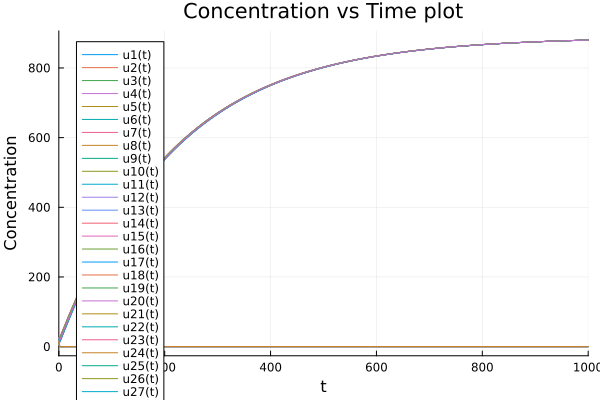

In [487]:
#Plotting our solution to ODEs/Time Series
Plot = plot(sol) 

# Set labels and title
ylabel!("Concentration")
title!("Concentration vs Time plot")

#u_2n-1 ,u_2n are A(t) and B(t) for cell n
#where n is element of {i,n}

In [488]:
Final_states = df[:,size(df,2)]
A_final_states=[]
B_final_states=[]

for i in 1:2:length(Final_states)
    append!(A_final_states,Final_states[i])
    append!(B_final_states,Final_states[i+1])
end


In [489]:
println(A_final_states)
println(B_final_states)

Any[880.0191104656742, 879.9469181152216, 879.9369291257061, 879.9036558386591, 879.9458623883927, 879.9710562214509, 880.0179696634815, 880.037521015045, 879.894665000499, 879.9502435825693, 0.0025074670913648295, 0.0025076730112007875, 0.0025077015061957665, 0.0025077964276335935, 0.002507676022798458, 0.002507604156504413, 0.0025074703451360343, 0.002507414582942991, 0.002507822077781233, 0.002507663524965035]
Any[880.0218024707103, 879.9131917297648, 879.9163216911985, 879.9107500511924, 879.9790502784391, 879.9980418477211, 879.9521602399764, 880.0303939245177, 879.9783875163237, 879.957938279738, 0.002507459413437772, 0.002507769223116523, 0.002507760293887107, 0.0025077761887848287, 0.0025075813540481936, 0.002507527183570536, 0.0025076580575701117, 0.002507434909728171, 0.0025075832444695608, 0.002507641575386435]


In [490]:

Trial = 1:(length(Final_states)/2)
#length(Trial)

1.0:1.0:20.0

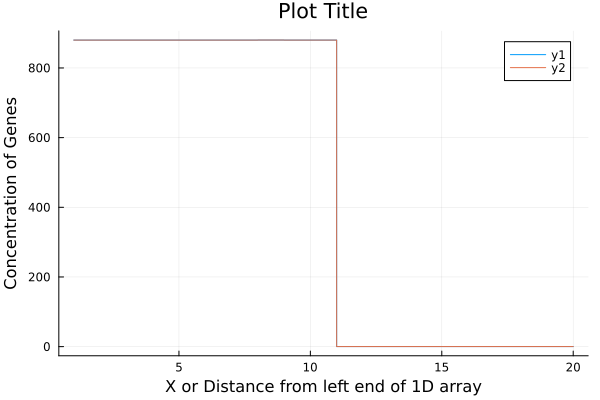

In [491]:
#Plotting the final values in a cell after time course
plot(Trial, A_final_states, seriestype = :stairs, legend = true)
plot!(Trial, B_final_states, seriestype = :stairs, legend = true)
# Set labels and title
xlabel!("X or Distance from left end of 1D array")
ylabel!("Concentration of Genes")
title!("Plot Title")

In [492]:
#Comparing if level of A or B is higher:
Cell_fates=[]
for i in 1:1:length(A_final_states)
    if A_final_states[i]>B_final_states[i]
        append!(Cell_fates,'A')
    elseif B_final_states[i]>A_final_states[i]
        append!(Cell_fates,'B')
    else
        append!(Cell_fates,'U')
    end
end
    
    

In [493]:
Cell_fates
#println(Cell_fates)
#Color_matrix = [RGB{Float64}(0,0,1) RGB{Float64}(1,0,0) RGB{Float64}(1,1,1)]
#Color_matrix

20-element Vector{Any}:
 'B': ASCII/Unicode U+0042 (category Lu: Letter, uppercase)
 'A': ASCII/Unicode U+0041 (category Lu: Letter, uppercase)
 'A': ASCII/Unicode U+0041 (category Lu: Letter, uppercase)
 'B': ASCII/Unicode U+0042 (category Lu: Letter, uppercase)
 'B': ASCII/Unicode U+0042 (category Lu: Letter, uppercase)
 'B': ASCII/Unicode U+0042 (category Lu: Letter, uppercase)
 'A': ASCII/Unicode U+0041 (category Lu: Letter, uppercase)
 'A': ASCII/Unicode U+0041 (category Lu: Letter, uppercase)
 'B': ASCII/Unicode U+0042 (category Lu: Letter, uppercase)
 'B': ASCII/Unicode U+0042 (category Lu: Letter, uppercase)
 'A': ASCII/Unicode U+0041 (category Lu: Letter, uppercase)
 'B': ASCII/Unicode U+0042 (category Lu: Letter, uppercase)
 'B': ASCII/Unicode U+0042 (category Lu: Letter, uppercase)
 'A': ASCII/Unicode U+0041 (category Lu: Letter, uppercase)
 'A': ASCII/Unicode U+0041 (category Lu: Letter, uppercase)
 'A': ASCII/Unicode U+0041 (category Lu: Letter, uppercase)
 'B': ASCII/Unic

In [494]:
using Colors

# Define the dictionary mapping cell fates to RGB colors
color_dict = Dict('A' => RGB(0, 0, 1),  # Blue
                  'B' => RGB(1, 0, 0),  # Red
                  'U' => RGB(1, 1, 1))  # White

# Original cell fates array
Cell_fates = []
for i in 1:length(A_final_states)
    if A_final_states[i] > B_final_states[i]
        append!(Cell_fates, 'A')
    elseif B_final_states[i] > A_final_states[i]
        append!(Cell_fates, 'B')
    elseif B_final_states[i] == A_final_states[i]
        append!(Cell_fates, 'U')
    end
end

# Convert cell fates array to color matrix
Color_matrix = [color_dict[fate] for fate in Cell_fates]

# Display color matrix
Color_matrix

#https://discourse.julialang.org/t/how-to-plot-a-matrix-of-colors/41920/5


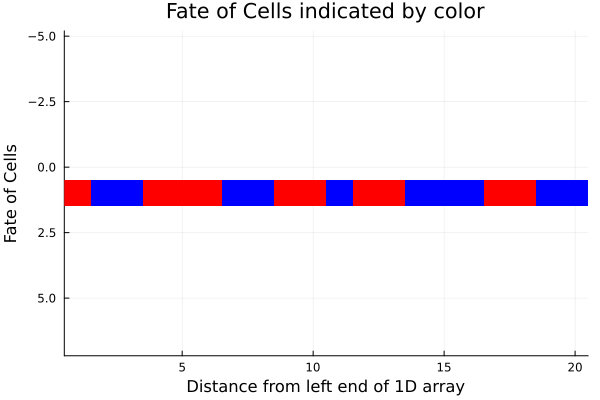

In [495]:
using Plots

# Define the color matrix
#Color_matrix = [RGB(0, 0, 1) RGB(1, 0, 0) RGB(1, 1, 1)]

#Transposing because colors are applied along columns of a matrix
Plots.heatmap(Color_matrix', c=:grays)

# Set labels and title
xlabel!("Distance from left end of 1D array")
ylabel!("Fate of Cells")
title!("Fate of Cells indicated by color")


In [496]:
Color_matrix_in=Color_matrix+Color_matrix
println(length(Color_matrix_in))
println(length(Color_matrix))

20
20


In [497]:
N_Cells = 20
iteration_no = 1000

1000

In [498]:
#Colors on average over 1000 simulations with 20 cells
Overall_fate_storer=zeros(N_Cells,iteration_no,3)
for iter in 1:1:iteration_no
    pars=[]
    append!(pars,N_Cells)
    z = rand(Uniform(10,25),N_Cells)
    append!(pars,repeat(z,2))
    append!(pars,rand(Uniform(-0.5,0.5),2*N_Cells))#Noise
    append!(pars,rand(Uniform(1,5),2)) #Alpha and Beta
    append!(pars,rand(Uniform(1,1.1))) #K
    append!(pars,rand(Uniform(0.002,0.005)),2) #Degradation rate

    p=[]
    p = pars[4*N_Cells+2:4*N_Cells+6]
    u0 = zeros(2*N_Cells)
    for k = 1 : 2*N_Cells
        u0[k] = (pars[k+1] +pars[2*N_Cells+1+k])
    end
    #println("Works")
    tmax = 1000
    tspan = (0.0,tmax)
    prob  = ODEProblem(Simple_model,u0,tspan,p)
    sol   = solve(prob)
    df=DataFrame(sol)
    #println(df)
    #println("Works")
    Final_states = df[:,size(df,2)]
    #println("Works")
    A_final_states=[]
    B_final_states=[]
    #println("Works")
    for i in 1:2:length(Final_states)
        append!(A_final_states,Final_states[i])
        append!(B_final_states,Final_states[i+1])
    end

    #Comparing if level of A or B is higher:
    Cell_fates=[]
    for i in 1:1:length(A_final_states)
        if A_final_states[i]>B_final_states[i]
            append!(Cell_fates,'A')
            Overall_fate_storer[i,iter,1]+=1
        elseif B_final_states[i]>A_final_states[i]
            append!(Cell_fates,'B')
            Overall_fate_storer[i,iter,2]+=1
        elseif B_final_states[i] == A_final_states[i]
            append!(Cell_fates,'U')
            Overall_fate_storer[i,iter,3]+=1
        end
    end
end


In [499]:
Overall_fate_storer[20,:,:]

1000×3 Matrix{Float64}:
 0.0  1.0  0.0
 1.0  0.0  0.0
 1.0  0.0  0.0
 1.0  0.0  0.0
 1.0  0.0  0.0
 1.0  0.0  0.0
 0.0  1.0  0.0
 1.0  0.0  0.0
 0.0  1.0  0.0
 1.0  0.0  0.0
 1.0  0.0  0.0
 0.0  1.0  0.0
 1.0  0.0  0.0
 ⋮         
 0.0  1.0  0.0
 1.0  0.0  0.0
 0.0  1.0  0.0
 1.0  0.0  0.0
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  1.0  0.0
 1.0  0.0  0.0
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  1.0  0.0
 1.0  0.0  0.0

In [500]:
Overall_fate_storer[1,:,:]

1000×3 Matrix{Float64}:
 0.0  1.0  0.0
 1.0  0.0  0.0
 1.0  0.0  0.0
 1.0  0.0  0.0
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  1.0  0.0
 1.0  0.0  0.0
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  1.0  0.0
 0.0  1.0  0.0
 0.0  1.0  0.0
 ⋮         
 0.0  1.0  0.0
 0.0  1.0  0.0
 0.0  1.0  0.0
 1.0  0.0  0.0
 1.0  0.0  0.0
 0.0  1.0  0.0
 1.0  0.0  0.0
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  1.0  0.0
 1.0  0.0  0.0
 1.0  0.0  0.0

In [511]:
#Finding the frequencies of given states:
Storing_array= Matrix{Float64}[]
for i in 1:1:N_Cells
    push!(Storing_array,sum(Overall_fate_storer[i,:,:],dims=1)) #Storing frequencies by summing along columns of our nx3 matrix where n is number of iterations
end

trial=1:N_Cells
plot()
for i in 1:1:3
    Fate_Array=zeros(N_Cells)
    for j in 1:1:N_Cells
        Fate_Array[j]=Storing_array[j][i]
    end
    print(Fate_Array)
    if i == 1
     plot!(trial,Fate_Array,seriestype = :scatter, legend = true,color="blue",label="A")
    elseif i == 2
     plot!(trial,Fate_Array,seriestype = :scatter, legend = true,color="red",label="B")
    elseif i == 3
     plot!(trial,Fate_Array,seriestype = :scatter, legend = true,color="white",label="U")
    end
end
xlabel!("Distance from left end of 1D array")
ylabel!("Frequency/No of Cells of given fates")
title!("Fate of Cells indicated by color over 1000 iterations")
savefig("plot.png")    

    
    
    

[517.0, 509.0, 519.0, 529.0, 508.0, 477.0, 511.0, 518.0, 490.0, 492.0, 483.0, 491.0, 481.0, 471.0, 492.0, 523.0, 489.0, 482.0, 510.0, 508.0][483.0, 491.0, 481.0, 471.0, 492.0, 523.0, 489.0, 482.0, 510.0, 508.0, 517.0, 509.0, 519.0, 529.0, 508.0, 477.0, 511.0, 518.0, 490.0, 492.0][0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

"C:\\Users\\Siddharth\\Jupyter\\Julia\\plot.png"

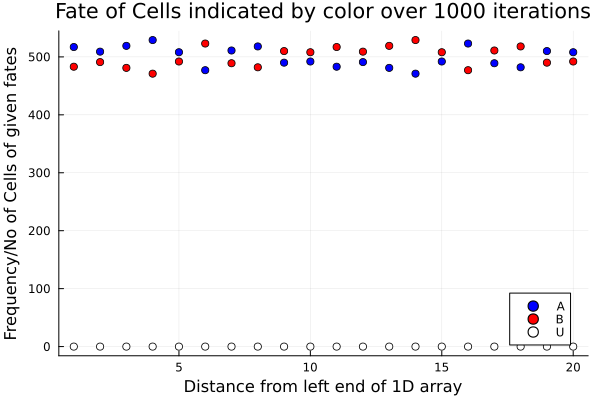

In [502]:
plot!()
# Set labels and title
xlabel!("Distance from left end of 1D array")
ylabel!("Frequency/No of Cells of given fates")
title!("Fate of Cells indicated by color over 1000 iterations")


In [509]:
savefig(plot!(),"Frequency_Toggle_Switch.png")

"C:\\Users\\Siddharth\\Jupyter\\Julia\\Frequency_Toggle_Switch.png"

In [467]:
sol.t

105-element Vector{Float64}:
    0.0
    0.08136762028571631
    0.22806267134923489
    0.4019908639566043
    0.6158922348409867
    0.8589629819206521
    1.1332981865384757
    1.4326857825119093
    1.756152035790528
    2.1006256407842754
    2.465753155148302
    2.852090328496416
    3.2630931631026368
    ⋮
  440.33110739535203
  467.61957152787915
  498.0732992091207
  531.1648049474029
  568.3458294343335
  609.3995614732775
  656.0112905593876
  708.4867759881798
  769.0019304036621
  838.8082275979065
  921.1400094629485
 1000.0

In [273]:
Storing_array

20-element Vector{Matrix{Float64}}:
 [488.0 512.0 0.0]
 [514.0 486.0 0.0]
 [489.0 511.0 0.0]
 [504.0 496.0 0.0]
 [480.0 520.0 0.0]
 [513.0 487.0 0.0]
 [516.0 484.0 0.0]
 [503.0 497.0 0.0]
 [506.0 494.0 0.0]
 [488.0 512.0 0.0]
 [512.0 488.0 0.0]
 [486.0 514.0 0.0]
 [511.0 489.0 0.0]
 [496.0 504.0 0.0]
 [520.0 480.0 0.0]
 [487.0 513.0 0.0]
 [484.0 516.0 0.0]
 [497.0 503.0 0.0]
 [494.0 506.0 0.0]
 [512.0 488.0 0.0]

In [274]:
Cell_fates

20-element Vector{Any}:
 'B': ASCII/Unicode U+0042 (category Lu: Letter, uppercase)
 'A': ASCII/Unicode U+0041 (category Lu: Letter, uppercase)
 'A': ASCII/Unicode U+0041 (category Lu: Letter, uppercase)
 'A': ASCII/Unicode U+0041 (category Lu: Letter, uppercase)
 'B': ASCII/Unicode U+0042 (category Lu: Letter, uppercase)
 'A': ASCII/Unicode U+0041 (category Lu: Letter, uppercase)
 'A': ASCII/Unicode U+0041 (category Lu: Letter, uppercase)
 'A': ASCII/Unicode U+0041 (category Lu: Letter, uppercase)
 'B': ASCII/Unicode U+0042 (category Lu: Letter, uppercase)
 'A': ASCII/Unicode U+0041 (category Lu: Letter, uppercase)
 'A': ASCII/Unicode U+0041 (category Lu: Letter, uppercase)
 'B': ASCII/Unicode U+0042 (category Lu: Letter, uppercase)
 'B': ASCII/Unicode U+0042 (category Lu: Letter, uppercase)
 'B': ASCII/Unicode U+0042 (category Lu: Letter, uppercase)
 'A': ASCII/Unicode U+0041 (category Lu: Letter, uppercase)
 'B': ASCII/Unicode U+0042 (category Lu: Letter, uppercase)
 'B': ASCII/Unic

In [237]:
    #Some problem with variable scope
function Overall_runner(N_Cells,iteration_no)
        pars_no=N_Cells
        Overall_fate_storer=zeros(N_Cells,3,iteration_no)
        println(Overall_fate_storer)
        for iter in 1:1:iteration_no
            pars=[]
            append!(pars,N_Cells)
            z = rand(Uniform(30,100),N_Cells)
            append!(pars,repeat(z,2))
            append!(pars,rand(Uniform(-0.5,0.5),2*N_Cells))#Noise
            append!(pars,rand(Uniform(10,20)),2) #Alpha and Beta
            append!(pars,rand(Uniform(1,4))) #K
            append!(pars,rand(Uniform(0,0.005)),2) #Degradation rate

            p=[]
            #N_Cells=pars[1]
            println(pars)
            p = pars[4*N_Cells+2:4*N_Cells+6]
            u0 = zeros(2*N_Cells)
            for k = 1 : 2*N_Cells
                u0[k] = (pars[k+1] +pars[2*N_Cells+1+k])
            end
            println("Works")
            tmax = 100
            tspan = (0.0,tmax)
            prob  = ODEProblem(Simple_model,u0,tspan,p)
            sol   = solve(prob)
            df=DataFrame(sol)
            println(df)
            println("Works")
            Final_states = df[:,size(df,2)]
            println("Works")
            A_final_states=[]
            B_final_states=[]
            println("Works")
            for i in 1:2:length(Final_states)
                append!(A_final_states,Final_states[i])
                append!(B_final_states,Final_states[i+1])
            end

            #Comparing if level of A or B is higher:
            Cell_fates=[]
            for i in 1:1:length(A_final_states)
                if A_final_states[i]>B_final_states[i]
                    append!(Cell_fates,'A')
                    Overall_fate_storer[i,1,iter]+=1
                elseif B_final_states[i]>A_final_states[i]
                    append!(Cell_fates,'B')
                    Overall_fate_storer[i,2,iter]+=1
                else
                    append!(Cell_fates,'U')
                    Overall_fate_storer[i,3,iter]+=1
                end
            end
        end

    end

Overall_runner (generic function with 1 method)

In [238]:
Overall_runner(1,2)


[0.0 0.0 0.0;;; 0.0 0.0 0.0]
Any[1, 65.55050576746527, 65.55050576746527, -0.3526924261263763, -0.4293144554496934, 11.325297287631846, 2, 1.10809002225082, 0.0023175339742757335, 2]
Works


LoadError: BoundsError: attempt to access 2-element Vector{Float64} at index [1:20]